In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import mixture
sns.set()
#%matplotlib

Using matplotlib backend: Qt5Agg


In [33]:
z_scores = pd.read_csv("./pca3_z.csv")

X = z_scores.values
labels = X[:,-1]
X = X[:,:-1]

pca = PCA()
pca.fit(X)
pca_data = pca.transform(X)

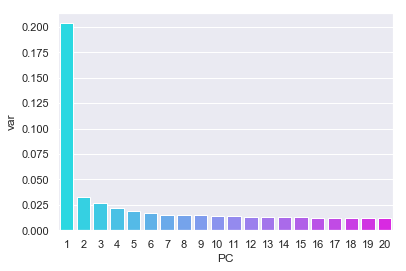

In [34]:
#Scree plot
df = pd.DataFrame({'var':pca.explained_variance_ratio_, 
                   'PC':[x+1 for x in range(len(pca.explained_variance_ratio_))]})

sns.barplot(x='PC',y="var", 
           data=df[0:20], palette='cool');

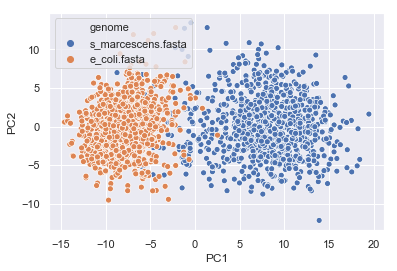

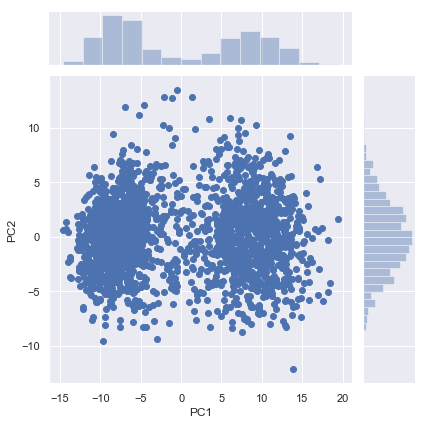

In [35]:
#PCA plot
pca_df = pd.DataFrame(pca_data, 
                      columns=['PC'+ str(x+1) for x in range(len(pca.explained_variance_ratio_))])
pca_df['genome']=labels

sns.scatterplot(x='PC1', y='PC2', hue='genome', data=pca_df)
sns.jointplot(x='PC1', y='PC2', data=pca_df)

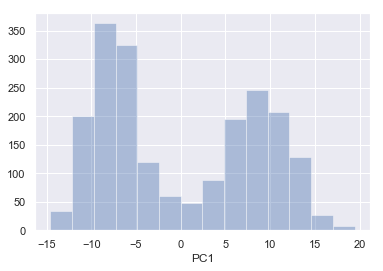

In [36]:
sns.distplot(pca_df['PC1'],kde=False)

In [6]:
db = DBSCAN(eps=0.3, min_samples=10).fit(pca_df['PC1'].values.reshape(-1, 1))
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
x=pd.DataFrame(np.c_[pca_df['PC1'].values,labels], columns=['PC','cluster'])
n_clusters_

NameError: name 'DBSCAN' is not defined

In [ ]:
sns.distplot(x.loc[x['cluster']==0]['PC'],kde=False, label='1')
sns.distplot(x.loc[x['cluster']==2]['PC'],kde=False, label='2')
plt.legend()

In [ ]:
z_scores = pd.read_csv("./contamination/s_enterica_z.csv")

all_pca = []
for n in [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]:
    group = z_scores.loc[z_scores['contamination']==n]
    X = group.values
    labels = X[:,-1]
    X = X[:,:-1]

    pca = PCA()
    pca.fit(X)
    pca_data = pca.transform(X)
    pca_df = pd.DataFrame(pca_data, 
                      columns=['PC'+ str(x+1) for x in range(len(pca.explained_variance_ratio_))])
    all_pca.append(pca_df)

all_pca

In [ ]:
plt.figure()
for i in range(len(all_pca)):
    plt.subplot(3,3,i+1)
    sns.distplot(all_pca[i][:,2],kde=False)

    